In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/Users/divyanshu/Desktop/datasets/drug_classification.csv')

In [6]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
df.shape

(200, 6)

# cleaning

In [12]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

In [15]:
df.drop_duplicates()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [21]:
df.nunique(axis=0).sort_values()

Sex              2
Cholesterol      2
BP               3
Drug_Type        5
Age             57
Na_to_K        198
dtype: int64

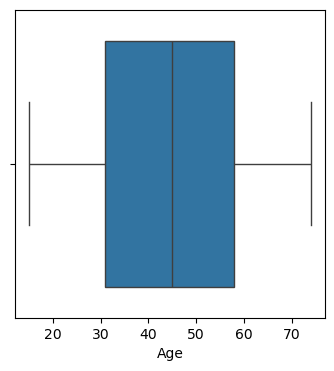

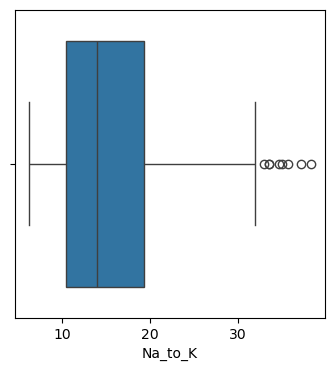

In [70]:
num=df.select_dtypes(include='number')
for var in num.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df,x=var)
    plt.show()

In [75]:
def remove_outliers_all_columns(app, columns):
    for column in columns:
        Q1 = app[column].quantile(0.25)
        Q3 = app[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        app = app[(app[column] >= lower_bound) & (app[column] <= upper_bound)]
    return app
num=df.select_dtypes(include='number')
df = remove_outliers_all_columns(df, num)

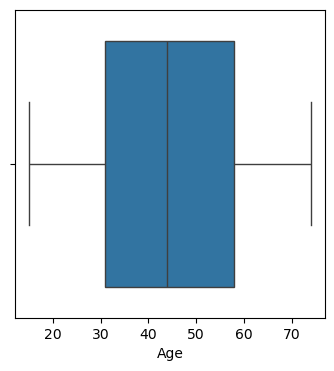

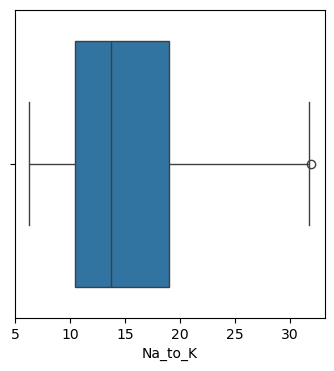

In [78]:
num=df.select_dtypes(include='number')
for var in num.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df,x=var)
    plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          192 non-null    int64  
 1   Sex          192 non-null    object 
 2   BP           192 non-null    object 
 3   Cholesterol  192 non-null    object 
 4   Na_to_K      192 non-null    float64
 5   Drug_Type    192 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ KB


In [107]:
obj=df.select_dtypes(include='object')
for var in obj.columns:
    print(df.groupby(by=var).size())
    print('-'*13)

Sex
F     92
M    100
dtype: int64
-------------
BP
HIGH      73
LOW       60
NORMAL    59
dtype: int64
-------------
Cholesterol
HIGH      99
NORMAL    93
dtype: int64
-------------
Drug_Type
DrugY    83
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64
-------------


In [135]:
from sklearn.preprocessing import LabelEncoder
obj = df.select_dtypes(include='object')
label_encoder = LabelEncoder()
for col in obj.columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
    print(f"\nLabel mapping for column '{col}':")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print('-'*50)
print(df)


Label mapping for column 'Sex':
{'F': 0, 'M': 1}
--------------------------------------------------

Label mapping for column 'BP':
{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
--------------------------------------------------

Label mapping for column 'Cholesterol':
{'HIGH': 0, 'NORMAL': 1}
--------------------------------------------------

Label mapping for column 'Drug_Type':
{'DrugY': 0, 'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4}
--------------------------------------------------
     Age Sex      BP Cholesterol  Na_to_K Drug_Type  Sex_encoded  BP_encoded  \
0     23   F    HIGH        HIGH   25.355     DrugY            0           0   
1     47   M     LOW        HIGH   13.093     drugC            1           1   
2     47   M     LOW        HIGH   10.114     drugC            1           1   
3     28   F  NORMAL        HIGH    7.798     drugX            0           2   
4     61   F     LOW        HIGH   18.043     DrugY            0           1   
..   ...  ..     ...         ... 

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  192 non-null    int64  
 1   Sex                  192 non-null    object 
 2   BP                   192 non-null    object 
 3   Cholesterol          192 non-null    object 
 4   Na_to_K              192 non-null    float64
 5   Drug_Type            192 non-null    object 
 6   Sex_encoded          192 non-null    int64  
 7   BP_encoded           192 non-null    int64  
 8   Cholesterol_encoded  192 non-null    int64  
 9   Drug_Type_encoded    192 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 16.5+ KB


In [161]:
df.drop(columns=obj)

,Age,Na_to_K,Sex_encoded,BP_encoded,Cholesterol_encoded,Drug_Type_encoded
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,3
2,47,10.114,1,1,0,3
3,28,7.798,0,2,0,4
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,3
196,16,12.006,1,1,0,3
197,52,9.894,1,2,0,4
198,23,14.020,1,2,1,4


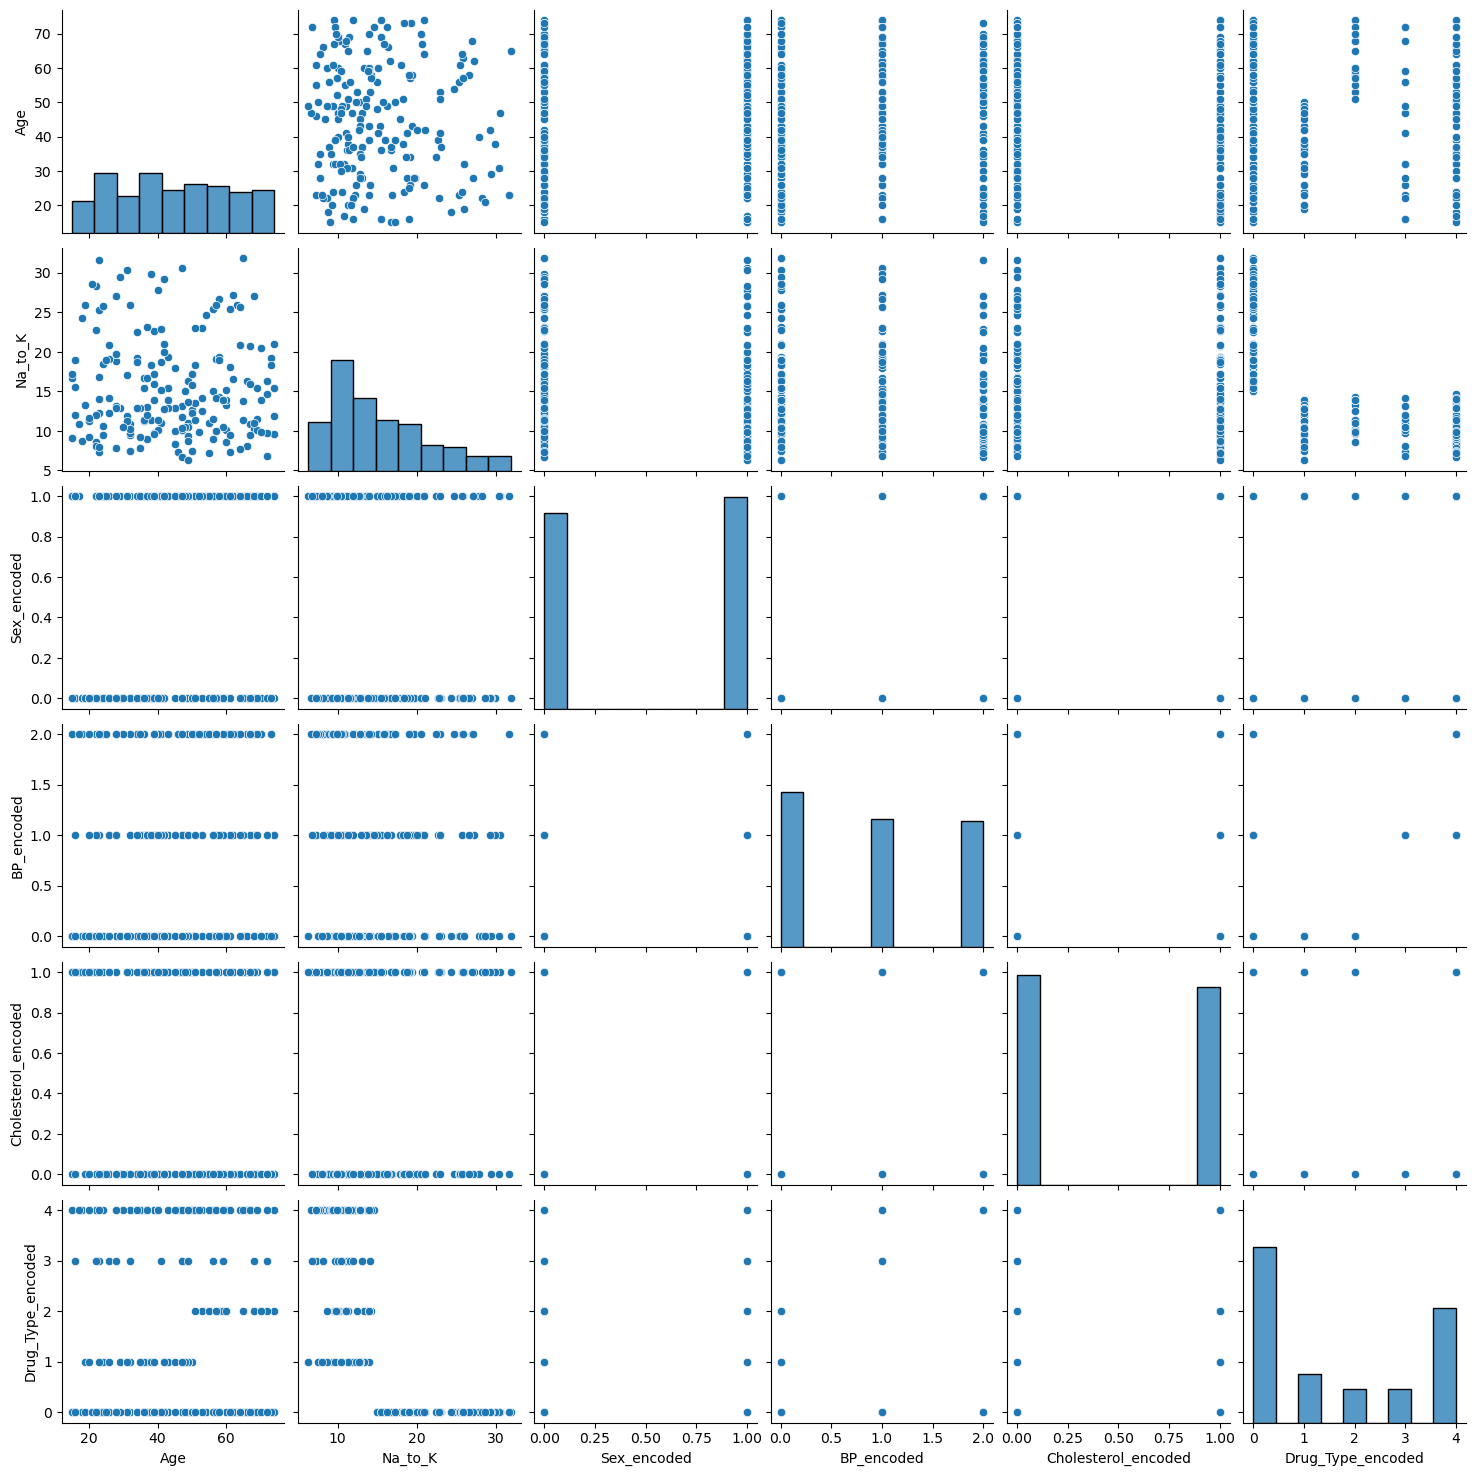

In [163]:
sns.pairplot(df)

In [169]:
df=df.drop(columns=obj)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  192 non-null    int64  
 1   Na_to_K              192 non-null    float64
 2   Sex_encoded          192 non-null    int64  
 3   BP_encoded           192 non-null    int64  
 4   Cholesterol_encoded  192 non-null    int64  
 5   Drug_Type_encoded    192 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.5 KB


# analysis

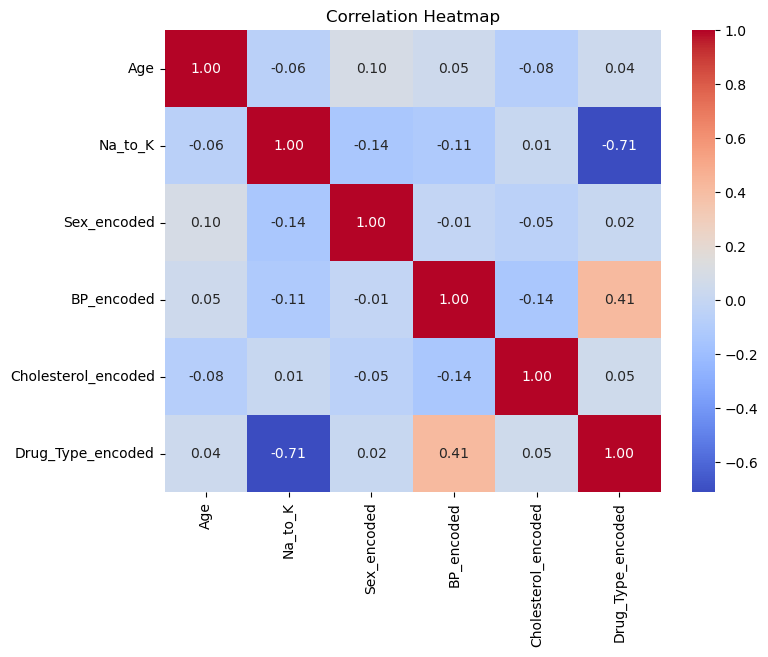

In [184]:
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/25362927.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Na_to_K', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/25362927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='Na_to_K', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/25362927.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Na_to_K', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/25362927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

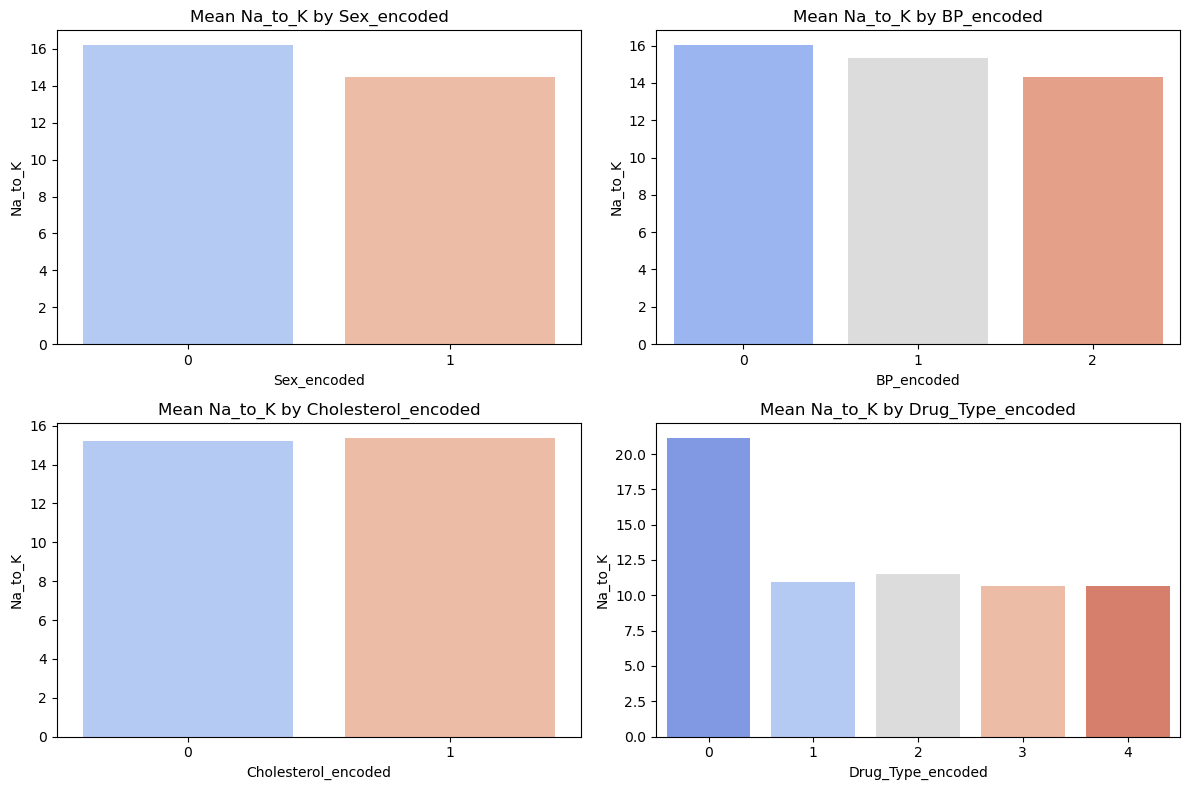

In [201]:
cols = ['Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Drug_Type_encoded']
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(cols, start=1):
    plt.subplot(2, 2, i)  
    sns.barplot(data=df, x=col, y='Na_to_K', ci=None, palette='coolwarm')
    plt.title(f'Mean Na_to_K by {col}')
    plt.tight_layout() 
plt.show()


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  192 non-null    int64  
 1   Na_to_K              192 non-null    float64
 2   Sex_encoded          192 non-null    int64  
 3   BP_encoded           192 non-null    int64  
 4   Cholesterol_encoded  192 non-null    int64  
 5   Drug_Type_encoded    192 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.5 KB


/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4140610905.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Age', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4140610905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='Age', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4140610905.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Age', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4140610905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

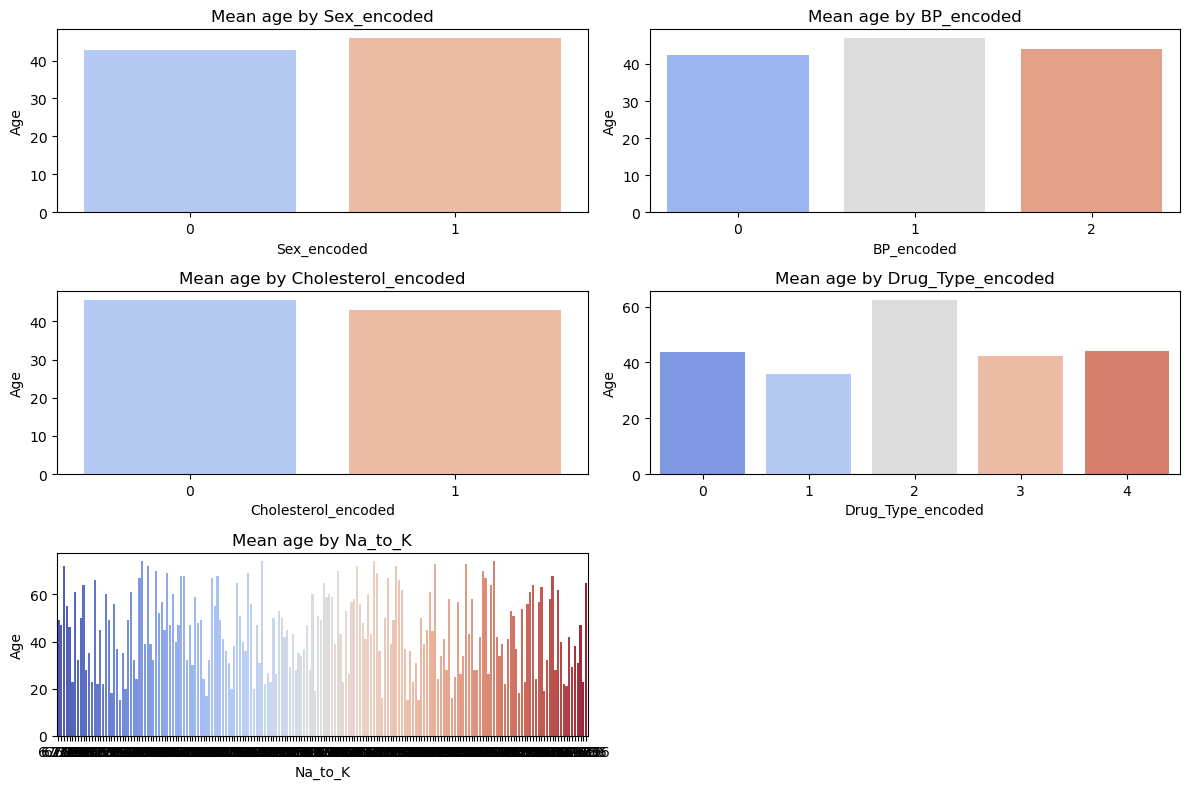

In [215]:
cols = ['Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Drug_Type_encoded','Na_to_K']
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(cols, start=1):
    plt.subplot(3, 2, i)  
    sns.barplot(data=df, x=col, y='Age', ci=None, palette='coolwarm')
    plt.title(f'Mean age by {col}')
    plt.tight_layout() 
plt.show()

/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4065171105.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sex_encoded', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4065171105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='Sex_encoded', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4065171105.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sex_encoded', ci=None, palette='coolwarm')
/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/4065171105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

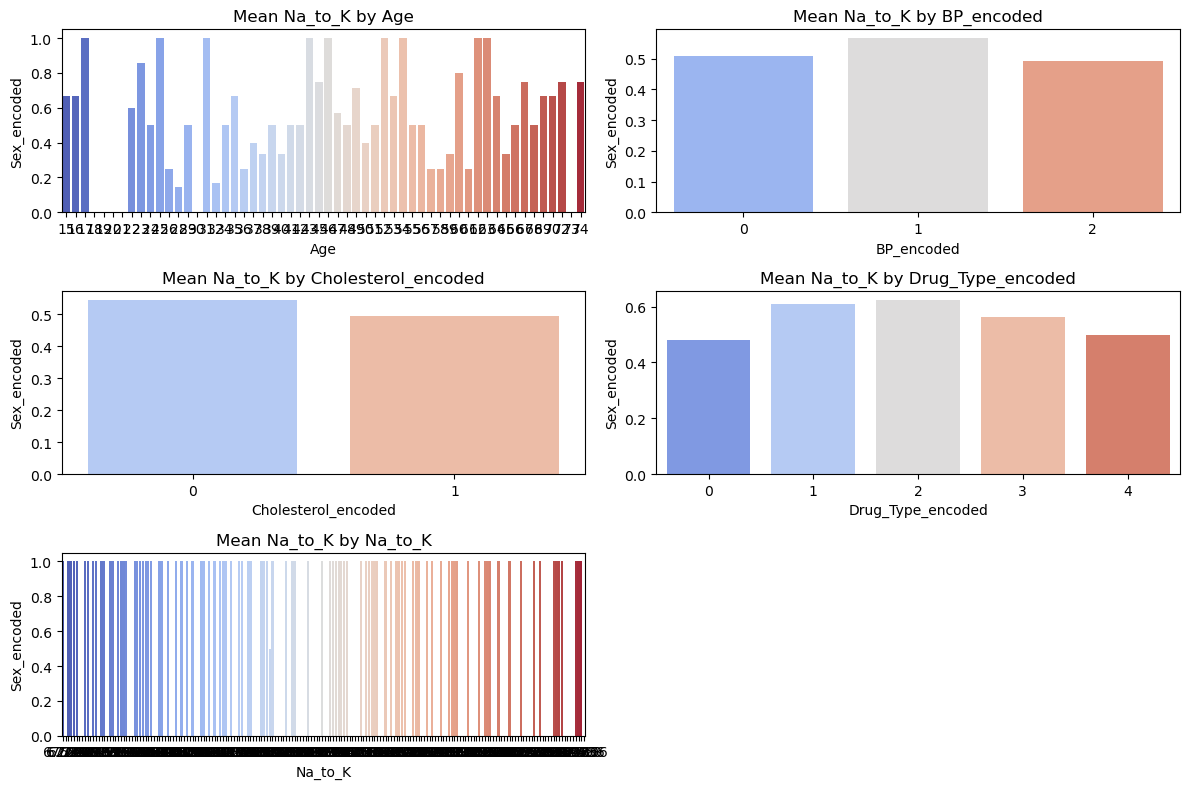

In [209]:
cols = ['Age', 'BP_encoded', 'Cholesterol_encoded', 'Drug_Type_encoded','Na_to_K']
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(cols, start=1):
    plt.subplot(3, 2, i)  
    sns.barplot(data=df, x=col, y='Sex_encoded', ci=None, palette='coolwarm')
    plt.title(f'Mean Na_to_K by {col}')
    plt.tight_layout() 
plt.show()

👉 According to above analysis:

-For people with Na_to_K more than 16, drug y is often prescribed (figure 1).
-The rate of Na_to_K is not much different in male and female (figure 2).
-The Na_to_K seems to have no correlation with the BP and Cholesterol (figure 3,4).
-It seems that drug X is mostly prescribed for people under 50 years old and drug B is prescribed for people over 50 years old. Other drugs ---are normally distributed in all ages and have no special correlation with Age (figure 5).
-Most people between the ages of 40 and 50 have a HIGH BP (figure 7).
-Most people between the ages of 35 and almost 50 have a HIGH Cholesterol (figure 8)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  192 non-null    int64   
 1   Na_to_K              192 non-null    float64 
 2   Sex_encoded          192 non-null    int64   
 3   BP_encoded           192 non-null    int64   
 4   Cholesterol_encoded  192 non-null    int64   
 5   Drug_Type_encoded    192 non-null    int64   
 6   age_range            192 non-null    category
dtypes: category(1), float64(1), int64(5)
memory usage: 10.9 KB


In [235]:
bin=[0,20,40,60,70,1000]
range=['0-20','20-40','40-60','60-70','70+']
df['age_range']=pd.cut(df['Age'], bins=bin, labels=range)
df.groupby(df['age_range']).size()

/var/folders/xv/bdx65p2x76v_cv03m7vrfgl80000gn/T/ipykernel_61095/3153203840.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df['age_range']).size()


age_range
0-20     14
20-40    70
40-60    69
60-70    29
70+      10
dtype: int64

In [ ]:
bin=[0,20,40,60,70,1000]
range=['0-20','20-40','40-60','60-70','70+']
df['age_range']=pd.cut(df['Age'], bins=bin, labels=range)
df.groupby(df['age_range']).size()

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  192 non-null    int64   
 1   Na_to_K              192 non-null    float64 
 2   Sex_encoded          192 non-null    int64   
 3   BP_encoded           192 non-null    int64   
 4   Cholesterol_encoded  192 non-null    int64   
 5   Drug_Type_encoded    192 non-null    int64   
 6   age_range            192 non-null    category
dtypes: category(1), float64(1), int64(5)
memory usage: 10.9 KB


In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

ValueError: Found input variables with inconsistent numbers of samples: [187, 192]